In [2]:
pip install numpy pandas matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 5.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 1.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 6.4 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.9 MB/s eta 0:00:00ta 0:00:01
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 7.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [matplotlib]1 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


[ 4.55729578e+01  4.61052027e+01  4.65964117e+01 ... -1.82193320e-03
 -1.85867727e-03 -1.89356124e-03]


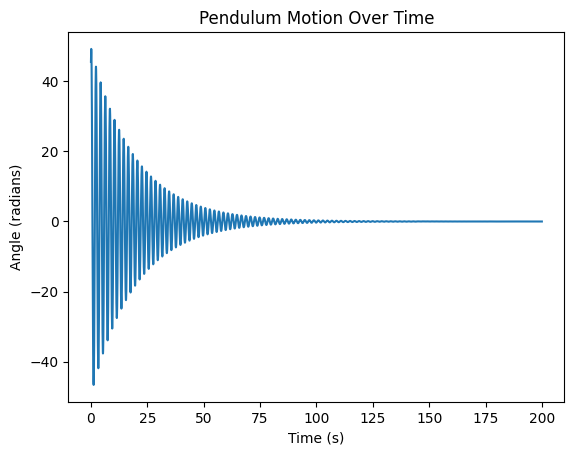

In [43]:
#single pendulum simulation/example

import numpy as np
import matplotlib.pyplot as plt

g = 9.81 # acceleration due to gravity (m/s^2)
L = 1.0 # length of pendulum (m)
mu = 0.1 # mass of pendulum (kg)

theta_0 = np.pi / 4 # initial angle (45 degrees)
theta_dot_0 = 1.0 # initial angular velocity

def theta_ddot(theta, theta_dot):
    return -mu *theta_dot - (g / L) * np.sin(theta)

def theta(t):
    theta = theta_0
    theta_dot = theta_dot_0
    dt = 0.01

    theta_values = []

    for time in np.arange(0, t, dt):
        theta += theta_dot * dt
        theta_dot += theta_ddot(theta, theta_dot) * dt
        theta_values.append(theta*(180/np.pi)) # Convert to degrees

    return np.array(theta_values)

def theta_dot(t):
    theta = theta_0
    theta_dot = theta_dot_0
    dt = 0.01

    theta_dot_values = []

    for time in np.arange(0, t, dt):
        theta += theta_dot * dt
        theta_dot += theta_ddot(theta, theta_dot) * dt
        theta_dot_values.append(theta_dot)  

    return np.array(theta_dot_values)

def plot_pendulum_motion_overTime(t):
    theta_values = theta(t)
    
    print(theta_values)

    plt.plot(np.arange(0, t, 0.01), theta_values)
    plt.title('Pendulum Motion Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (radians)')
    

def plot_pendulum_motion_Vel(t):
    theta_values = theta(t)
    theta_dot_values = theta_dot(t)
    
    plt.plot(theta_values, theta_dot_values)
    plt.title('angle vs. velocity')
    plt.xlabel('angle (degrees)')
    plt.ylabel('velocity (rad/s)')
    plt.grid()
    

# plot_pendulum_motion_Vel(12)
plot_pendulum_motion_overTime(200)



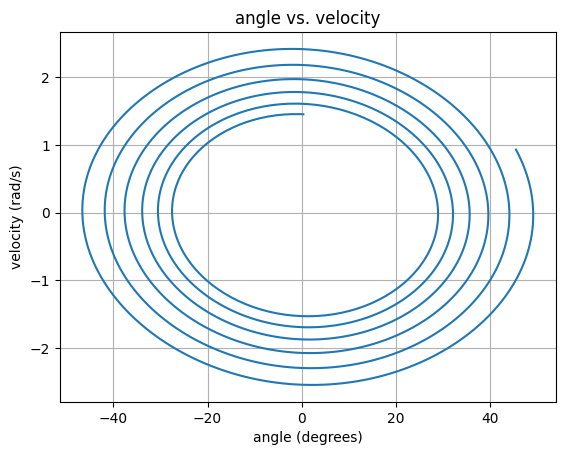

In [44]:
plot_pendulum_motion_Vel(12)

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 9.81
L = 1.0
mu = 0.1  # Set to >0 to simulate damping (friction)

# θ'' = -μθ' - (g/L)sin(θ)
def theta_ddot(theta, theta_dot):
    return -mu * theta_dot - (g / L) * np.sin(theta)

# Simulate trajectory using Euler method
def simulate_trajectory(theta0, theta_dot0, t_max=10, dt=0.01):
    theta = theta0
    theta_dot = theta_dot0

    thetas = []
    theta_dots = []

    for _ in np.arange(0, t_max, dt):
        thetas.append(theta)
        theta_dots.append(theta_dot)

        theta_dot += theta_ddot(theta, theta_dot) * dt
        theta += theta_dot * dt

    return np.array(thetas), np.array(theta_dots)

# Plot the vector field and trajectory
def plot_phase_space(theta0=np.pi/3, theta_dot0=0.0, t_max=10):
    # Grid for vector field
    theta_vals = np.linspace(-2*np.pi, 2*np.pi, 30)
    theta_dot_vals = np.linspace(-4, 4, 30)
    T, T_dot = np.meshgrid(theta_vals, theta_dot_vals)

    dtheta = T_dot
    dtheta_dot = theta_ddot(T, T_dot)

    # Normalize arrows for better visibility
    mag = np.sqrt(dtheta**2 + dtheta_dot**2)
    dtheta /= mag
    dtheta_dot /= mag

    plt.figure(figsize=(10, 6))
    plt.quiver(T, T_dot, dtheta, dtheta_dot, angles='xy', scale=20, width=0.005, color='gold')

    # Plot trajectory
    thetas, theta_dots = simulate_trajectory(theta0, theta_dot0, t_max)
    plt.plot(thetas, theta_dots, color='cyan', lw=2)

    # Style
    plt.title("Phase Space of a Pendulum")
    plt.xlabel(r"$\theta$ (radians)")
    plt.ylabel(r"$\dot{\theta}$ (rad/s)")
    plt.xlim(-2*np.pi, 2*np.pi)
    plt.ylim(-4, 4)
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.show()


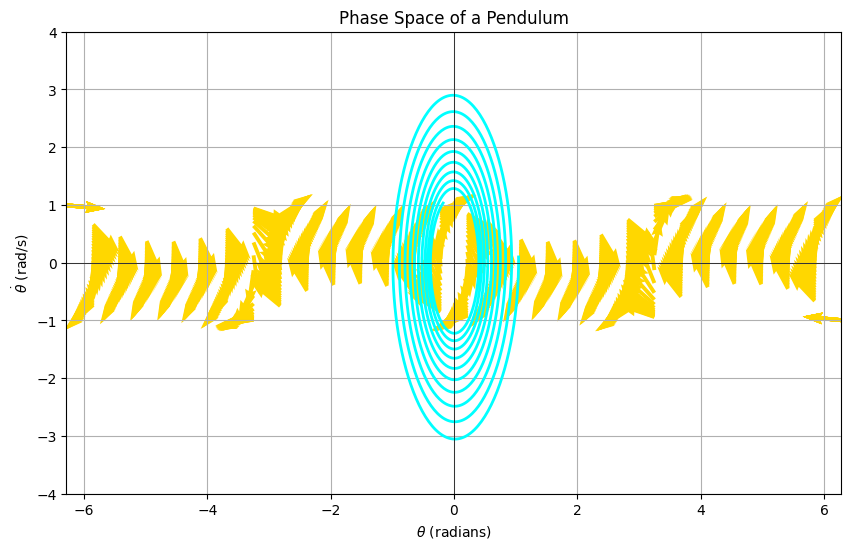

In [54]:
plot_phase_space(theta0=np.pi/3, theta_dot0=0.1, t_max=20)
